# <b><u>Lending Club Use-Case</u></b>

## <u> Problem Statement</u>

<p><u>Introduction:</u>You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
    This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.
    
</p>



Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
    If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

##### Use-Case Presenters:
    1. Shweta Rao: Group Facilator
    2. Pragadeesh S: Group Memeber

In [1]:
#imports variable
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data Understanding:
 
Dataset contains the complete loan data for all loans issued through the time period 2007 to 2011. Rejected Loans are not considered in the dataset.

In [14]:
#reading the csv
data_val = pd.read_csv('/Users/sameerhegde/Documents/PG - Material/Assignment/Solution/loan.csv',low_memory=False)

In [15]:
#shape of the dataset
data_val.shape

(39717, 111)

In [5]:
#brief idea of the dataset
data_val

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#describing the dataset
data_val.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

Here you see most of the Columns has value NaN.Now we will clean the dataset 

The Dataset consists of 39717 Records and 111 Attributes.
### Cleaning the Dataset:
Deteting the loan behavioural variables.
##### Loan Behavioural variables: 
These Variables define the methods/patterns of a loan payment behaviour of a customer which is after approval of loan and it is not useful in analysing the Defaulters which has to done before approval of loan.
<ul>
<li>delinq_2yrs</li>
<li>earliest_cr_line</li>
<li>inq_last_6mths</li>
<li>open_acc</li>
<li>pub_rec</li>
<li>revol_bal</li>
<li>revol_util</li>
<li>total_acc</li>
<li>out_prncp</li>
<li>out_prncp_inv</li>
<li>total_pymnt</li>
<li>total_pymnt_inv</li>
<li>total_rec_prncp</li>
<li>total_rec_int</li>
<li>total_rec_late_fee</li>
<li>recoveries</li>
<li>collection_recovery_fee</li>
<li>last_pymnt_d</li>
<li>last_pymnt_amnt</li>
<li>last_credit_pull_d</li>
<li>application_type</li>
</ul>

In [16]:
beh_vars = ['application_type', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'inq_last_6mths', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

In [17]:
# Removing Behavioural variables
data_val = data_val.drop(beh_vars, axis=1)

In [18]:
#checking null values
data_val.isnull().sum().loc[data_val.isnull().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 65, dtype: int64

In [20]:
#remove Column with null value more than 50% 
data_val = data_val.loc[:, (data_val.isnull().sum(axis=0) <= data_val.shape[0]/2)]

In [21]:
data_val.shape

(39717, 33)

<p> Either we delete columns with 50% and more values as NaN </p>

In short here we have dropped all the columns with Nan / 0 and empty values and below irrelavant columns
Droping few of the irrelavant column as below
<ul>
<li>'id' and 'member_id' is just an identification number which has no value for analysis.</li>
<li>'url' is a link that has no value for analysis.</li>
<li>'desc' is the description text which is not useful for analysis.</li>
<li>'pymnt_plan' as the values are n</li>
<li>'zip_code' contains 'xx'</li>
<li>'pub_rec' as all values are 0</li>
<li> 'policy_code' as all the values are 0</li>
<li>'funded_amnt' and 'funded_amnt_inv' has values equivalant to 'loan_amnt'.</li>
<li>'emp_title'are names which is also identifier that has no value for analysing patterns for defaulters.</li>
<li>'acc_now_delinq' and 'delinq_amnt' has all values as 0.</li>
<li>'application_type' has all value as 'INDIVIDUAL'</li>

<li>'pymnt_plan' has all values as 'n'.</li>

<li>'initial_list_status' has all values as 'f'</li>
<li>'chargeoff_within_12_mths', 'tax_liens', and 'collections_12_mths_ex_med' has values 0 </li>        
</ul>    

In [26]:
#main datset would be
df = data_val
#check Null value after removing few columns
df.isnull().sum().loc[df.isnull().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [27]:
# checking dataset
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,f,NaN,1,0,NaN,0,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [29]:
# check number of unique values in each column
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

###### Columns with only one value:
These columns have only one unique value. It has no variance and its not useful for analysis.
<ul>
<li>tax_liens</li>
<li>delinq_amnt</li>
<li>chargeoff_within_12_mths</li>
<li>acc_now_delinq</li>
<li>policy_code</li>
<li>collections_12_mths_ex_med</li>
<li>initial_list_status</li>
<li>pymnt_plan</li>
</ul>

From the Data Dictionary and by looking at the info above, we can drop some of the columns which are not useful for analysis.
<ul>
<li>'id' and 'member_id' is just an identification number which has no value for analysis.</li>
<li>'url' is a link that has no value for analysis.</li>
<li>'desc' is the description text which is not useful for analysis.</li>
<li>'emp_title' and 'title' are names which is also identifier that has no value for analysing patterns for defaulters.</li>
<li>'zip_code' represents state which we have a separate variable 'addr_state', also zip code has XX in them.</li>
</ul>

In [30]:
no_var = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']

In [31]:
# Removing variables with no variance
df = df.drop(no_var, axis=1)

In [32]:
drop_vars = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']

In [33]:
# Removing variables which are not useful for analysis
df = df.drop(drop_vars, axis=1)

In [34]:
# Checking null values again after deleting columns
df.isnull().sum().loc[df.isnull().sum()>0]

emp_length              1075
pub_rec_bankruptcies     697
dtype: int64

In [35]:
df.shape

(39717, 18)

Now lets look deleting values in rows with null values 

Here:
1.emp_length              1075
2.pub_rec_bankruptcies     697
dtype: int64



In [36]:
# Dropping rows with null values
df = df.dropna(subset=['emp_length','pub_rec_bankruptcies'])

In [37]:
df.shape

(37945, 18)

Lets analyse the columns 'loan_amnt' , 'funded_amnt' and 'funded_amnt_inv' as visually the values looks similar

Text(0.5, 0, 'Fund Amount Inv')

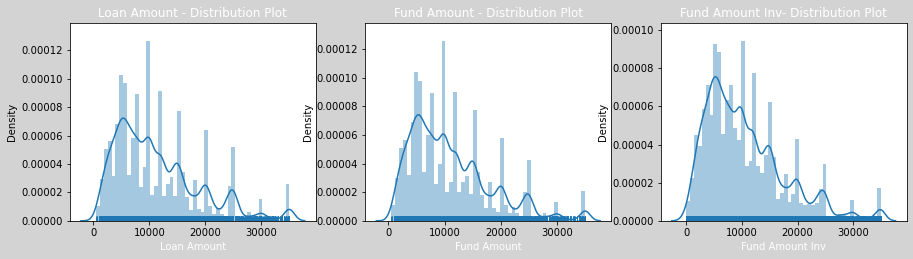

In [39]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
plt.subplot(2, 3, 1)
loan_x = sns.distplot(df['loan_amnt'],rug = True)
loan_x.set_title('Loan Amount - Distribution Plot',color='w')
loan_x.set_xlabel('Loan Amount',color='w')

plt.subplot(2, 3, 2)
loan_x = sns.distplot(df['funded_amnt'],rug = True)
loan_x.set_title('Fund Amount - Distribution Plot',color='w')
loan_x.set_xlabel('Fund Amount',color='w')

plt.subplot(2, 3, 3)
loan_x = sns.distplot(df['funded_amnt_inv'],rug = True)
loan_x.set_title('Fund Amount Inv- Distribution Plot',color='w')
loan_x.set_xlabel('Fund Amount Inv',color='w')

In [40]:
# Checcking loan_amnt, funded_amnt, funded_amnt_inv
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,37945.000000,37945.000000,37945.000000
mean,11316.141784,11038.908947,10604.233768
std,7478.772560,7206.799900,7113.791153
min,500.000000,500.000000,0.000000
25%,5550.000000,5500.000000,5000.000000
50%,10000.000000,10000.000000,9150.000000
75%,15000.000000,15000.000000,14576.592640
max,35000.000000,35000.000000,35000.000000


From above observation we can conclude that values in columns 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' looks statistically same. Removing redundent values and using loan_amount for analysis.

In [41]:
# removing funded_amnt, funded_amnt_inv
df = df.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1)

In [42]:
df.shape

(37945, 16)

In [58]:
df['loan_status'].value_counts()

Fully Paid     31566
Charged Off     5281
Current         1098
Name: loan_status, dtype: int64

In [59]:
#removing Current loan status as this is not required for analysing defaulters.
df = df[df['loan_status']!= 'Current']

Some of the columns with numerical values has strings / symbols in them, like column 'term' has string 'months' in them which is not required. <br> <br>
Cleaning up columns:
<li> From 'term' removing 'months'</li>
<li> From 'int_rate' removing '%'</li>
<li> From 'emp_length' removing 'years'</li>

### <h3>Lets Clean the Data : </h3>

In [45]:
#Data cleaning
#Remove % for 'int_rate', for calculation
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(nm.float64)


In [47]:
# Removing string 'month' from term column and converting to int type
df['term'] = df['term'].str.replace(r' months', '').astype(nm.int64)

In [48]:
# Removing 'Years' and extracting only numbers from emp_length
df['emp_length'][df['emp_length'] == '< 1 year'] = '0.5'
df['emp_length']=df.emp_length.str.extract('(\d+\.\d+|\d+)').astype(nm.float64)

Extracting month and year as separate columns for columns:
<li> issue_d </li>

In [49]:
# Converting to datetime formate
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [50]:
# separating month and year for date columns
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

Now that we have extracted month and year from 'issue_d'. Lets drop the column

In [51]:
# dropping original date columns
df = df.drop('issue_d', axis = 1)

In [60]:
# check info for cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   term                  36847 non-null  int64  
 2   int_rate              36847 non-null  float64
 3   installment           36847 non-null  float64
 4   grade                 36847 non-null  object 
 5   sub_grade             36847 non-null  object 
 6   emp_length            36847 non-null  float64
 7   home_ownership        36847 non-null  object 
 8   annual_inc            36847 non-null  float64
 9   verification_status   36847 non-null  object 
 10  loan_status           36847 non-null  object 
 11  purpose               36847 non-null  object 
 12  addr_state            36847 non-null  object 
 13  dti                   36847 non-null  float64
 14  pub_rec_bankruptcies  36847 non-null  float64
 15  issue_d_month      

In [61]:
df.shape

(36847, 17)

### Exploratory Data Analysis(EDA): 
#### Descriptive statistics:

In [55]:
# checking descriptive stats of the dataset
df.annual_inc.astype(nm.int64)

0        24000
1        30000
2        12252
3        49200
4        80000
         ...  
39562    35000
39573    63500
39623    39000
39666    40000
39680    36153
Name: annual_inc, Length: 37945, dtype: int64

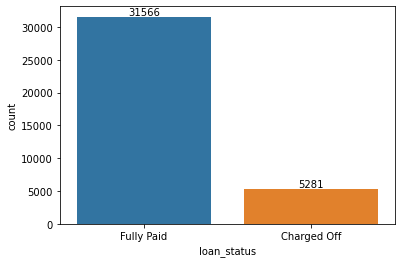

In [62]:
# checking Loan_status count
ax=sns.countplot(x='loan_status', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [63]:
df.loan_status.value_counts(normalize=True)

Fully Paid     0.856678
Charged Off    0.143322
Name: loan_status, dtype: float64

Approximately, 14.33% of loans are <b>defaulted/charged_off</b> 

In [64]:
df['term'].value_counts()

36    27590
60     9257
Name: term, dtype: int64

In [65]:
df['int_rate'].value_counts()

10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
13.84      1
22.94      1
24.40      1
21.48      1
11.22      1
Name: int_rate, Length: 336, dtype: int64

In [66]:
# covert the int_rate to numeric value we have already removed the %
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

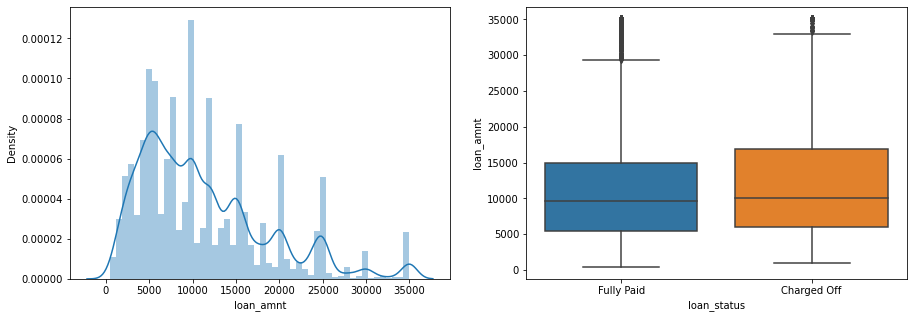

In [67]:
# Analysing loan amount
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
ax1=sns.distplot(df['loan_amnt'], ax=axs[0])
ax2=sns.boxplot(x='loan_status',y='loan_amnt',data=df, ax=axs[1])

<li>loan_amnt distribution is slightly right-skewed as mean is greater than median as shown in the descriptive statistics.<br>
<li>Most of the loan_amnt are below 15000 - 3rd Quartile. charged off has a slightly greater loan_amnt at 3rd Quartile.

In [68]:
df_plot = df[df['loan_status']=='Charged Off']

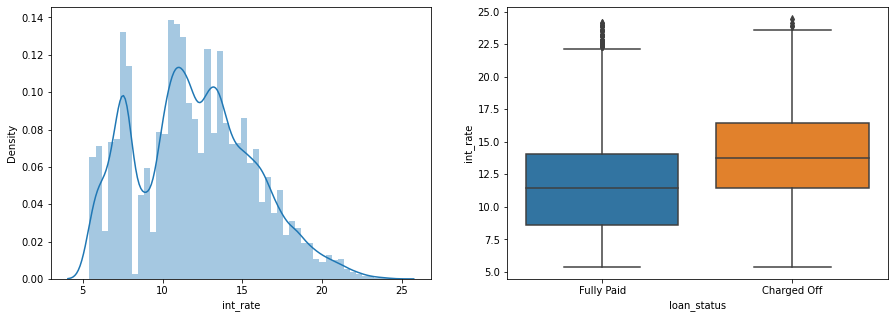

In [69]:
# Analysing loan status
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
ax1=sns.distplot(df['int_rate'], ax=axs[0])
ax2=sns.boxplot(y='int_rate', x='loan_status', data=df, ax=axs[1])

For Fully paid loans the interest rate are comparitively lower when compared to charged off.<br>
Thus, Charging lower interest rate might have less chances of getting charged-off.

In [70]:
#home_owner
df['home_ownership'].value_counts()

RENT        17698
MORTGAGE    16343
OWN          2708
OTHER          98
Name: home_ownership, dtype: int64

In [71]:
#verification_status
df['verification_status'].value_counts()

Not Verified       15582
Verified           11771
Source Verified     9494
Name: verification_status, dtype: int64

In [72]:
#purpose
df['purpose'].value_counts()

debt_consolidation    17384
credit_card            4801
other                  3608
home_improvement       2737
major_purchase         2061
small_business         1657
car                    1431
wedding                 894
medical                 647
moving                  543
house                   349
vacation                342
educational             299
renewable_energy         94
Name: purpose, dtype: int64

<h2> Univariant</h2>

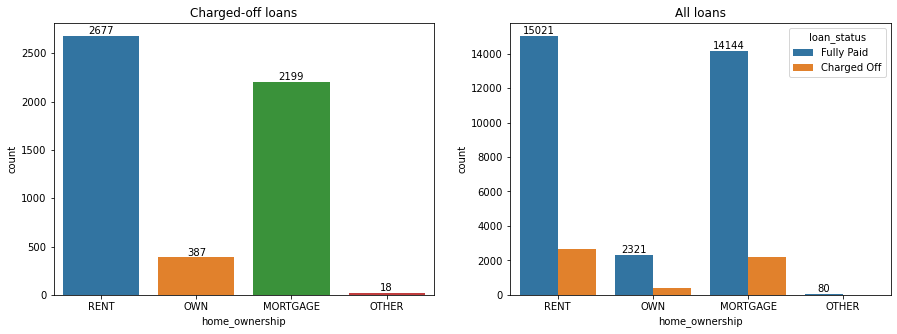

In [78]:
# Analysing home_ownership
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='home_ownership', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

91% of Charged_off customers are with RENT and MORTGAGED home.<br>
Out of total applicants, 92% are with RENT and MORTGAGED home.<br>
There is a fair chance that applicants with home_ownership as RENT or MORTGAGED getting defaulted.

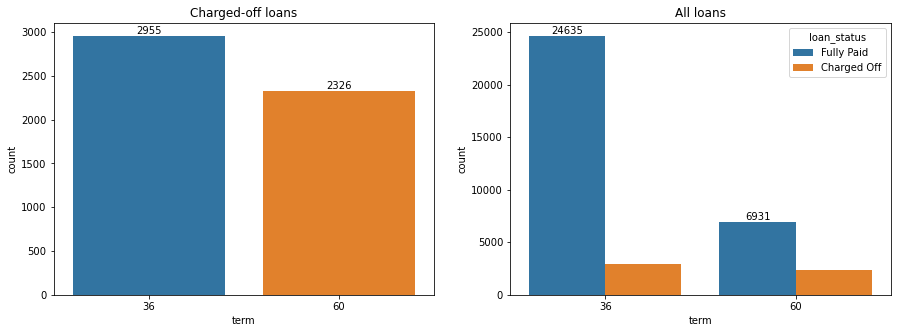

In [79]:
# Analysing term
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='term', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='term', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

In [80]:
df_plot.term.value_counts(normalize=True)

36    0.559553
60    0.440447
Name: term, dtype: float64

In [81]:
df.term.value_counts(normalize=True)

36    0.748772
60    0.251228
Name: term, dtype: float64

75% of the total loans are with 36 months tenure
The number of defaulters for both the tenure are almost similar, but consitering the total number of loans the ratio of charged-off loans and fully paid loans are high for 60 months term.

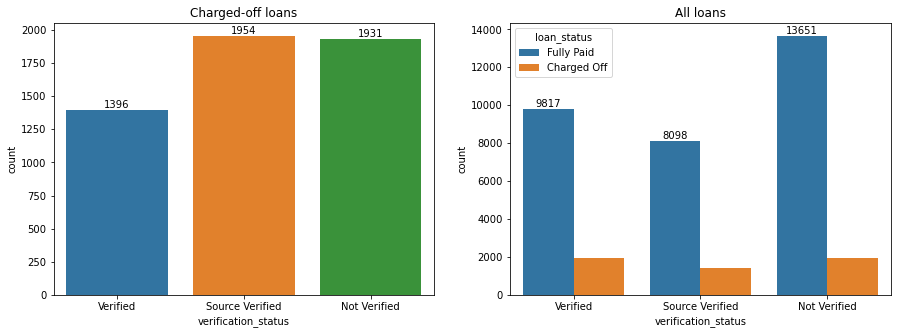

In [82]:
# Analysing verification_status
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='verification_status', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

In [83]:
df_plot.verification_status.value_counts(normalize=True)

Verified           0.370006
Not Verified       0.365650
Source Verified    0.264344
Name: verification_status, dtype: float64

In [84]:
df.verification_status.value_counts(normalize=True)

Not Verified       0.422884
Verified           0.319456
Source Verified    0.257660
Name: verification_status, dtype: float64

Almost all the varified status have same values of charged of loans.<br>
Thus, varification status might not have much effect on defaulters.

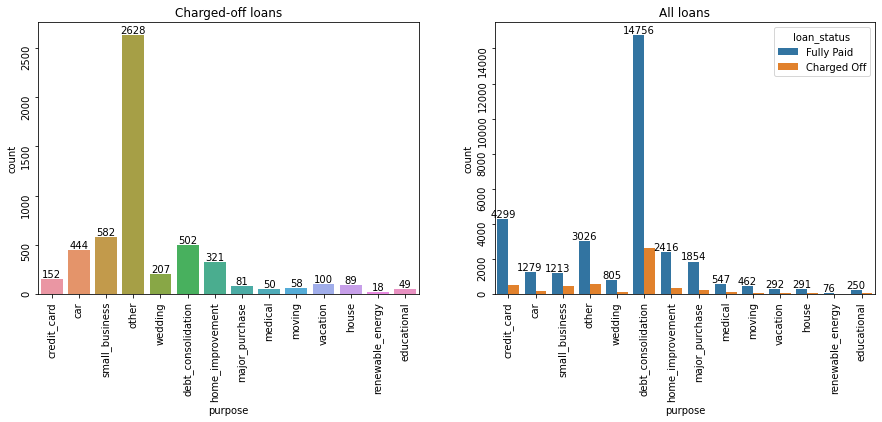

In [85]:
# Analysing purpose
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='purpose', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='purpose', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)
axs[0].tick_params(labelrotation=90)
axs[1].tick_params(labelrotation=90)

In [86]:
df_plot.purpose.value_counts(normalize=True)

debt_consolidation    0.497633
other                 0.110206
credit_card           0.095058
small_business        0.084075
home_improvement      0.060784
major_purchase        0.039197
car                   0.028782
medical               0.018936
wedding               0.016853
moving                0.015338
house                 0.010983
vacation              0.009468
educational           0.009279
renewable_energy      0.003408
Name: purpose, dtype: float64

Many applicants are getting loans for the purpose of debt_consolidation.<br>
Around 50% of the charged_off customers are getting loan for the purpose of debt_consolidation

Text(0.5, 0, 'Interested Rate')

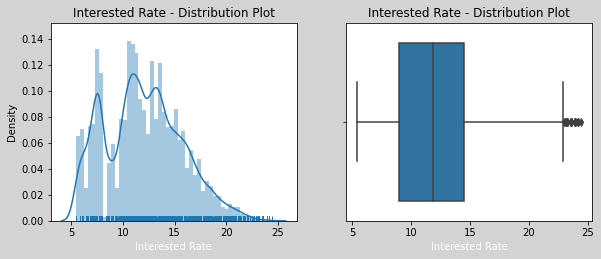

In [90]:
# Analysing purpose
plt.figure(figsize=(15,8), facecolor='lightgrey')
plt.subplot(2, 3, 1)
loan_x = sns.distplot(df['int_rate'],rug = True)
loan_x.set_title('Interested Rate - Distribution Plot')
loan_x.set_xlabel('Interested Rate',color='w')

plt.subplot(2, 3, 2)
loan_x = sns.boxplot(df['int_rate'])
loan_x.set_title('Interested Rate - Distribution Plot')
loan_x.set_xlabel('Interested Rate',color='w')
#Here the maximum distribution of 'init_rate' is in the range 10% - 18%

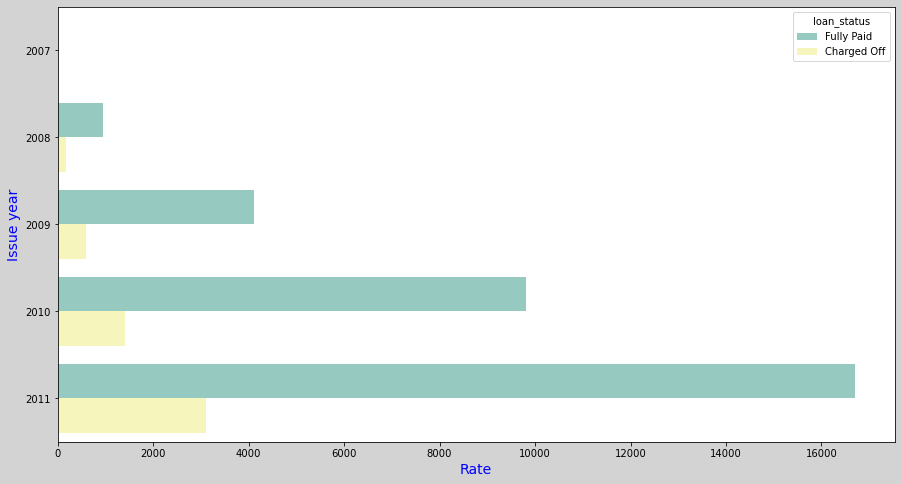

In [91]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="issue_d_year",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Issue year',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

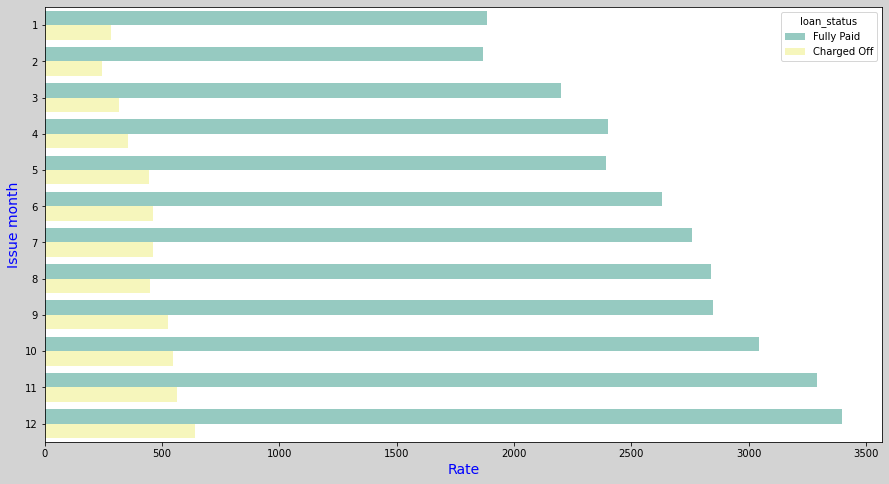

In [92]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="issue_d_month",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Issue month',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

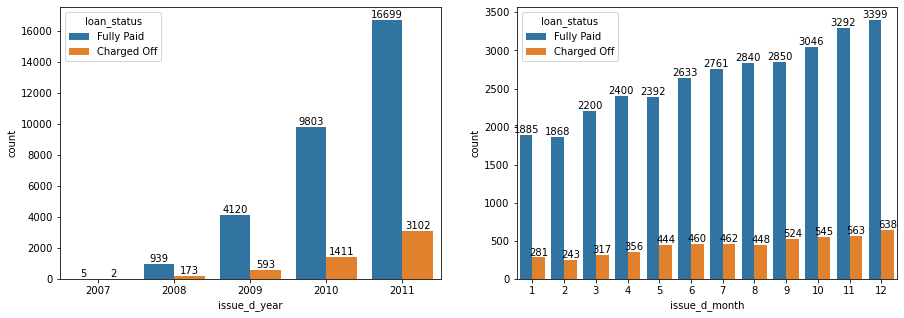

In [93]:
# Analysing issued date
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
ax1=sns.countplot(x='issue_d_year',hue='loan_status', data=df, ax=axs[0])
ax2=sns.countplot(x='issue_d_month',hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

For each year, the total loans granted increase, also charged-off loans increases proportionally.<br>
Loans granted increses towards the end of year, increasing charged-off loans proportionally.

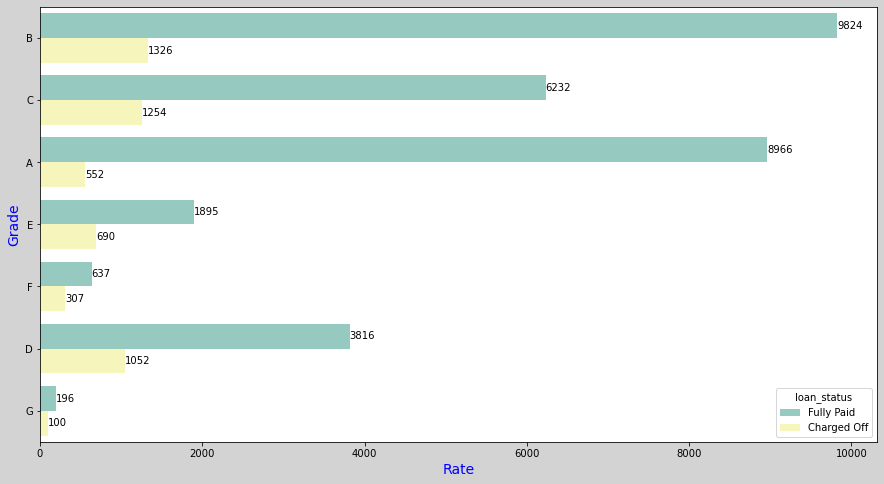

In [95]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
ax = sns.countplot(y="grade",data= df,hue='loan_status',palette = "Set3")

ax.set_ylabel('Grade',fontsize=14,color = 'b')
ax.set_xlabel('Rate',fontsize=14,color = 'b')  
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [96]:
df_plot.grade.value_counts(normalize=True)

B    0.251089
C    0.237455
D    0.199205
E    0.130657
A    0.104526
F    0.058133
G    0.018936
Name: grade, dtype: float64

Grades B & C has almost 25% of defaulters for each grades.<br>
Grades F & G, the number of loans are less but more than 50% of them are defaulted

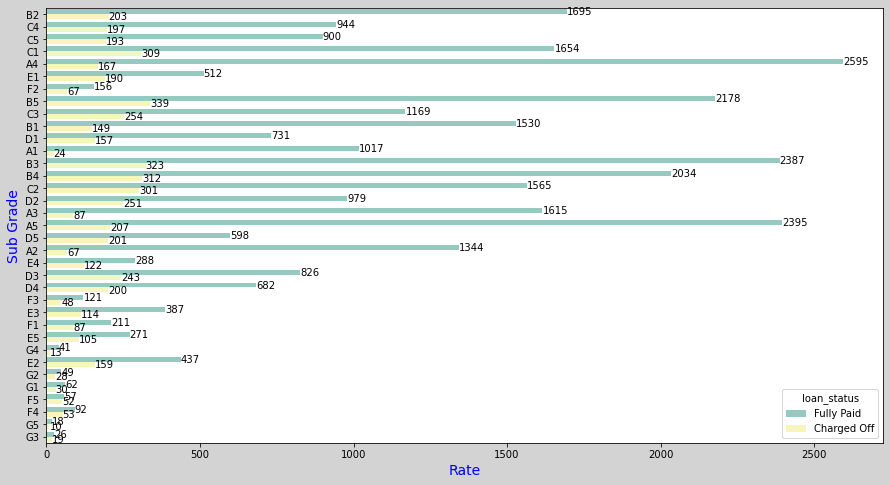

In [98]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
ax = sns.countplot(y="sub_grade",data= df,hue='loan_status',palette="Set3")

ax.set_ylabel('Sub Grade',fontsize=14,color = 'b')
ax.set_xlabel('Rate',fontsize=14,color = 'b')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

From grade analysis, we know that A & B have many loans and B & C have high defaulter rate.<br>
Sub_groups B3,B4,B5,C1,C2 have high defaulter rate.

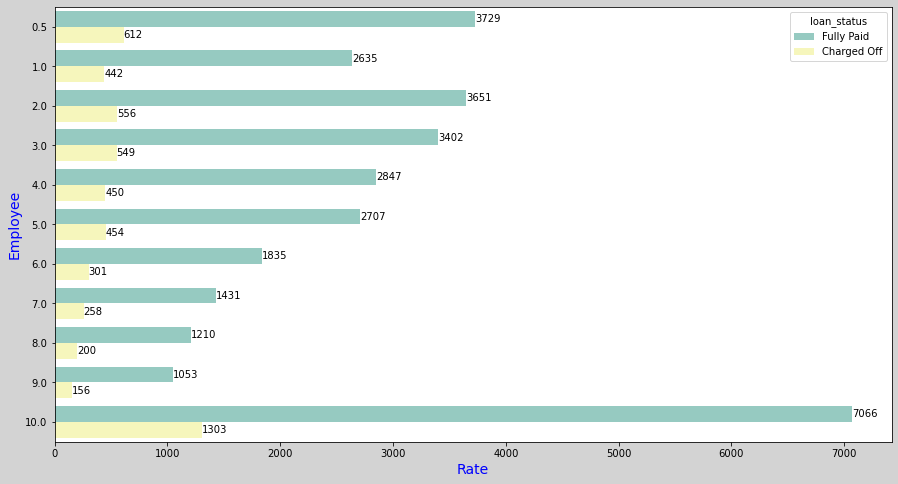

In [99]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
ax = sns.countplot(y="emp_length",data= df,hue='loan_status',palette="Set3")

ax.set_ylabel('Employee',fontsize=14,color = 'b')
ax.set_xlabel('Rate',fontsize=14,color = 'b')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The total loans and charged-off loans are proportional for emp_length variable. <br>
Thus, If number of loans increase in a emp_length, the defaulters also increases for that emp_length

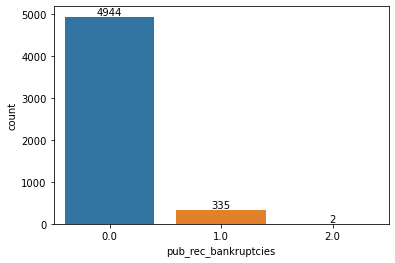

In [100]:
# Analysing pub_rec_bankruptcies
ax=sns.countplot(x='pub_rec_bankruptcies', data=df_plot)
for container in ax.containers:
    ax.bar_label(container)

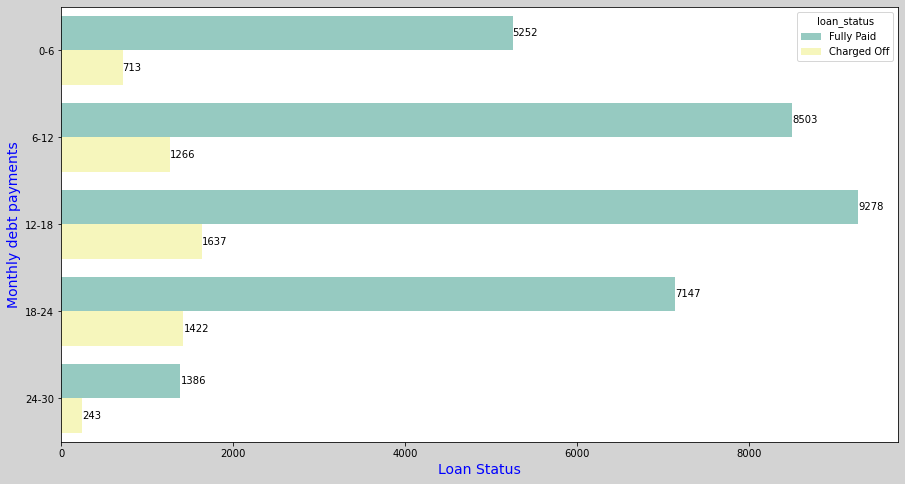

In [101]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
df['dtig'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
ax = sns.countplot(y="dtig",data= df,hue='loan_status',palette="Set3")

ax.set_ylabel('Monthly debt payments',fontsize=14,color = 'b')
ax.set_xlabel('Loan Status',fontsize=14,color = 'b')      
for container in ax.containers:
    ax.bar_label(container)
plt.show()

dti is between 12-18 for "Charged Off"

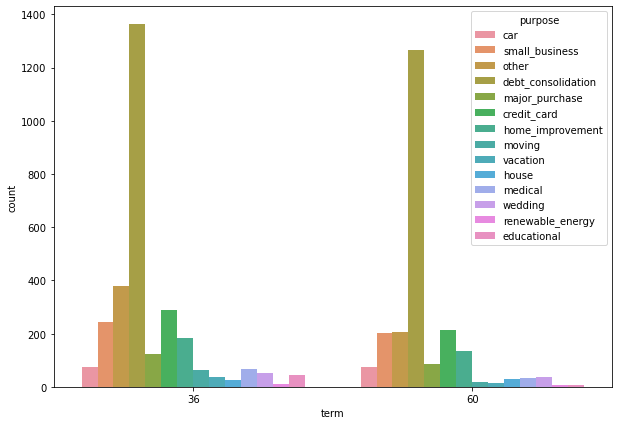

In [102]:
# Analysing term and purpose
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df_plot)
plt.show()

Defaulters for all purposes are almost identical for both the terms.

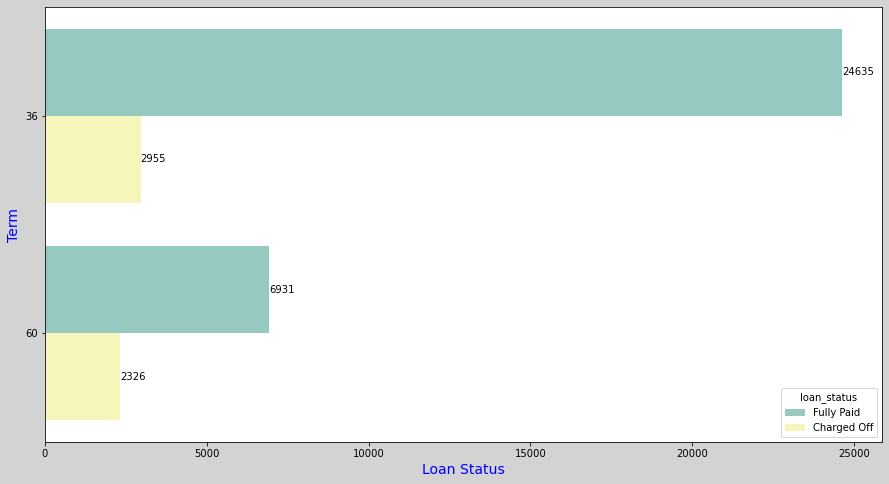

In [105]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
ax = sns.countplot(y="term",data= df,hue='loan_status',palette="Set3")

ax.set_ylabel('Term',fontsize=14,color = 'b')
ax.set_xlabel('Loan Status',fontsize=14,color = 'b')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Marginal Defaulters for Term of 36 months

<h2> Bivariant Analysis</h2>

We will  Analyse 2 column value together to get the conclusion on defaulters

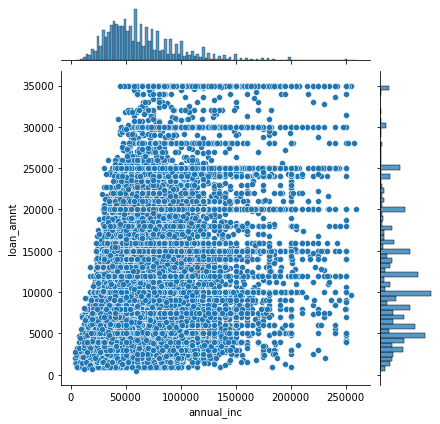

In [106]:
# Analysing anual_inc and loan_amnt
sns.jointplot('annual_inc', 'loan_amnt', df.loc[df['annual_inc']<260000])
plt.show()

Loan applicants with annual income less than 50k getting loans above 25k which is 50% of their annual income. These is a high chance for these type of loan getting defaulted.

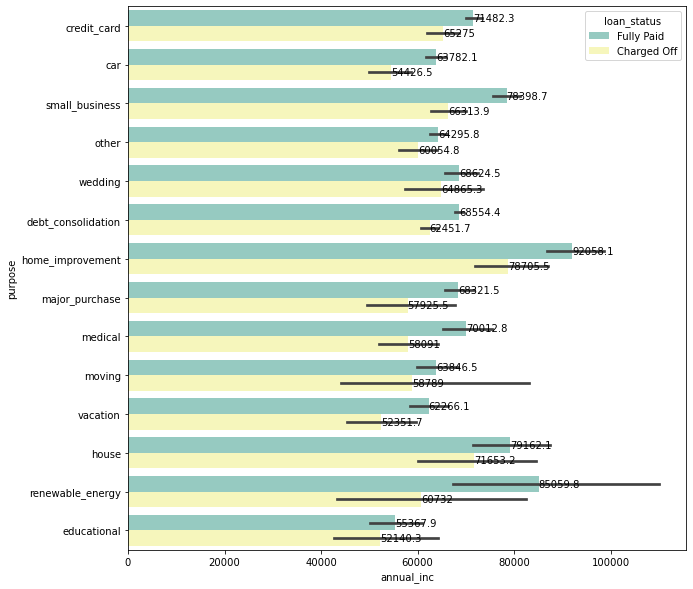

In [108]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Loan taken with the purpose of 'home_improvement' are likely to default

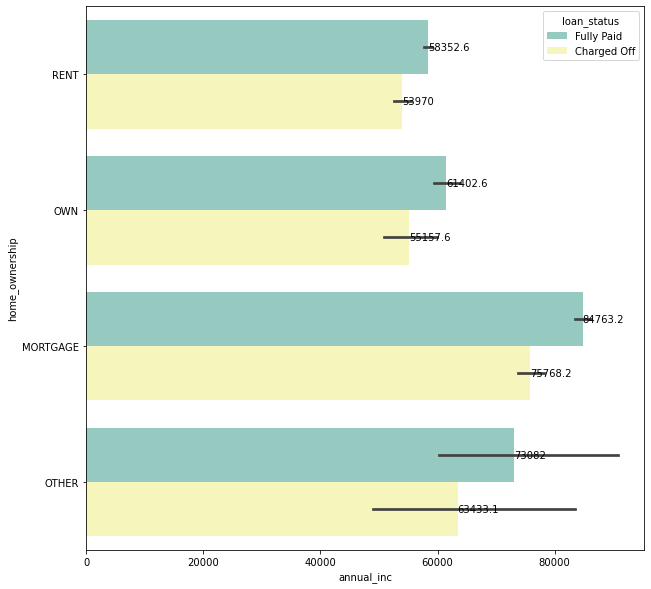

In [109]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='annual_inc', y='home_ownership', hue ='loan_status',palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

'home_ownership' with value MORTGAGE are likely to default

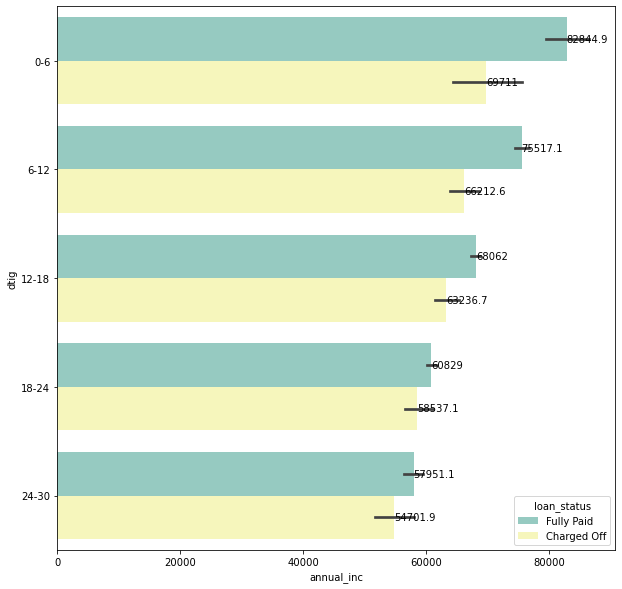

In [110]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='annual_inc', y='dtig', hue ='loan_status',palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

'dtig' with 0-6 are likely to default

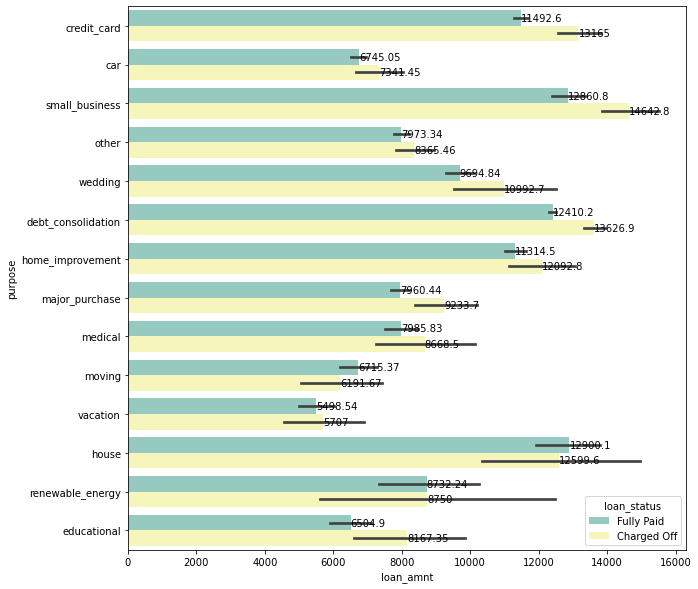

In [111]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status',palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

'small_business' , 'house' and 'debt_consolidation' purpose type against loan_amt are likely to default

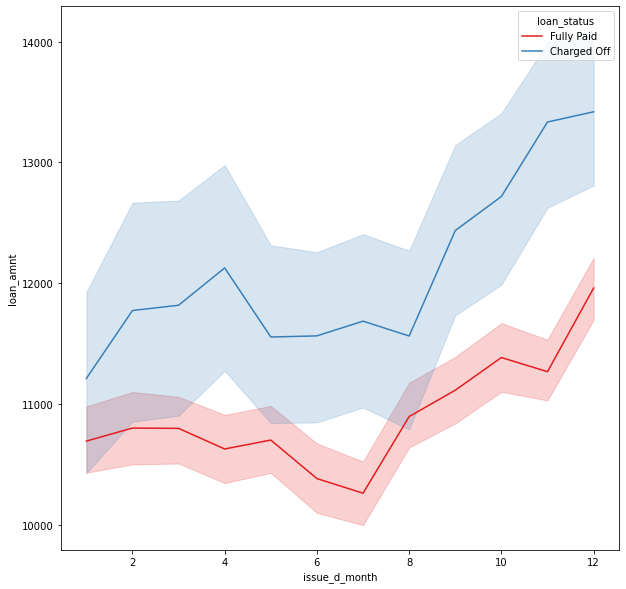

In [112]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(data =df,x='issue_d_month', y='loan_amnt', hue ='loan_status',palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

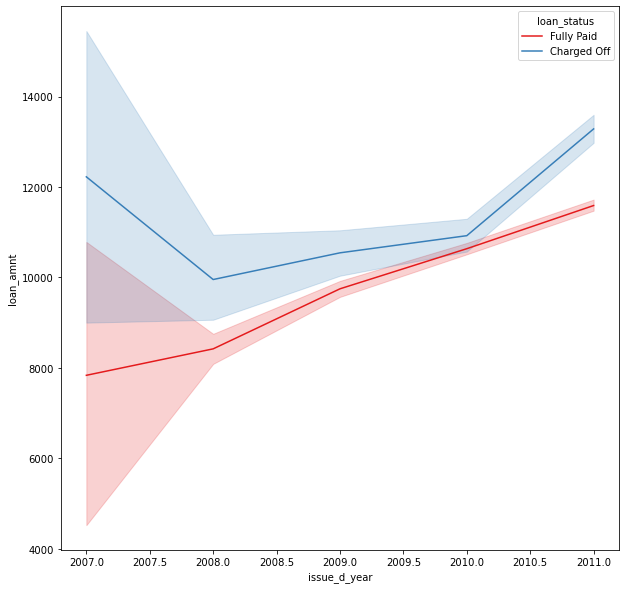

In [113]:
plt.figure(figsize=(10,10))
sns.lineplot(data =df,x='issue_d_year', y='loan_amnt', hue ='loan_status',palette="Set1")
plt.show()

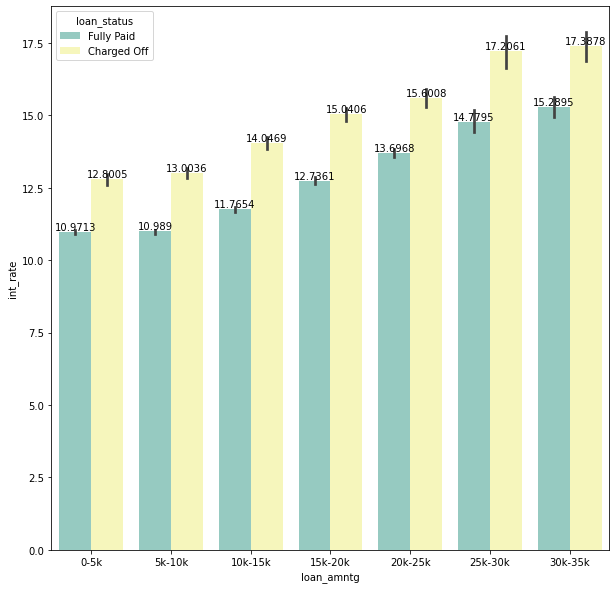

In [115]:
df['loan_amntg'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=
                          ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='loan_amntg', y='int_rate', hue ='loan_status',palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

'25k-30k' and '30k-35k' value for 'loan_amt' and with 'int_rate' of over and above 16.5

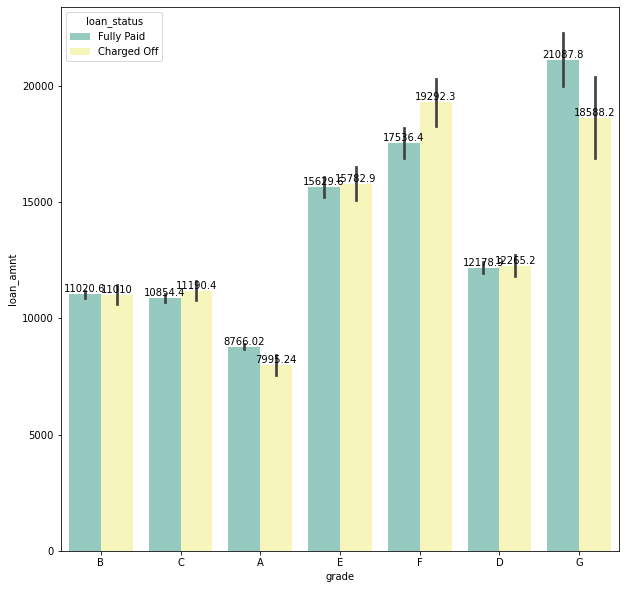

In [116]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='grade', y='loan_amnt', hue ='loan_status',palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Grade and 'loan_amt' defaulter falls under F,E and G

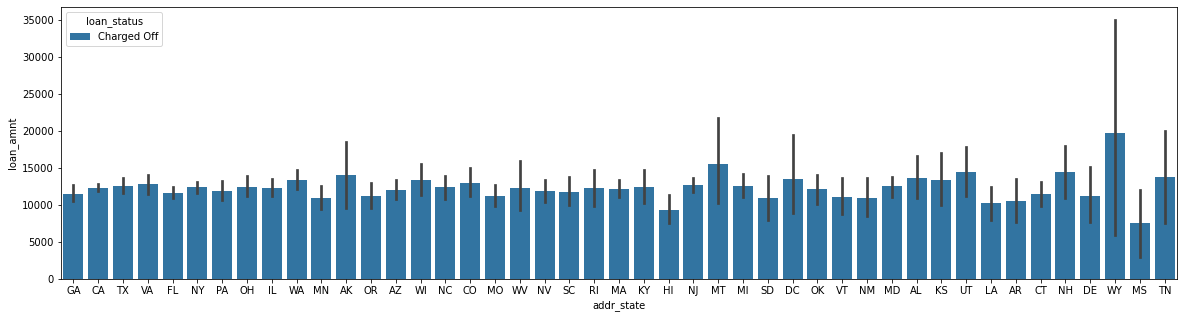

In [120]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=df_plot, estimator=nm.mean)
plt.show()

Loan applicants from the state WY are having high chances to be defaulter.

<AxesSubplot:>

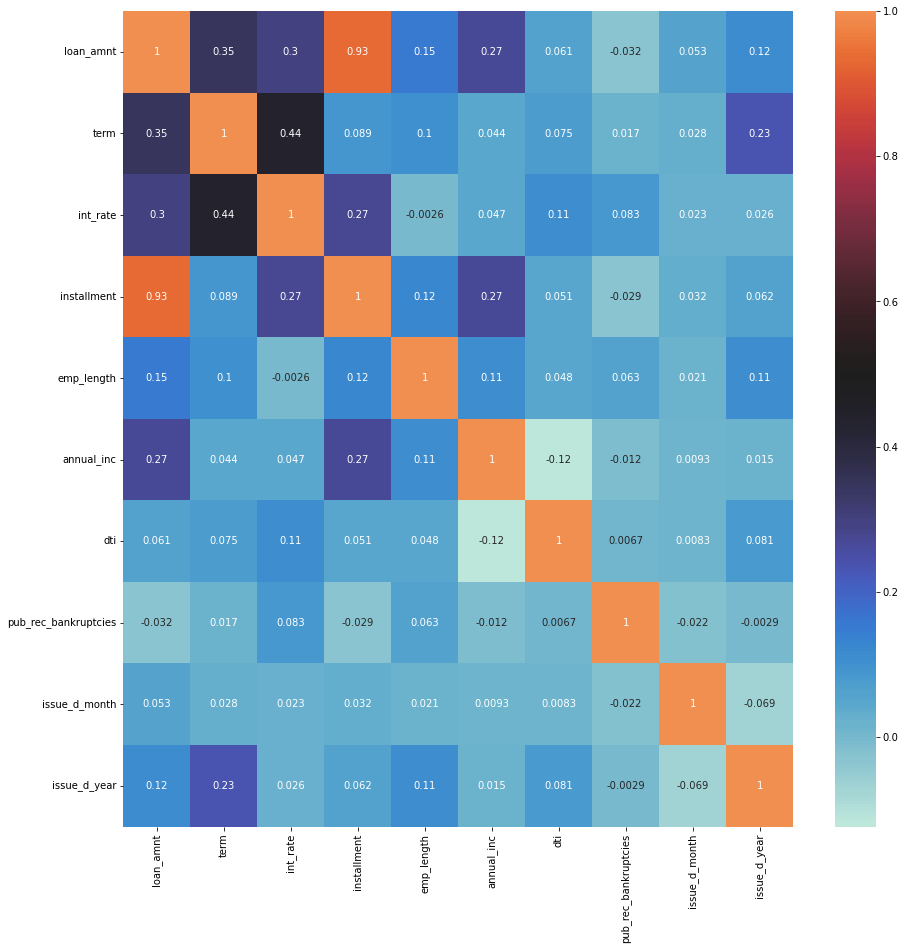

In [121]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, center=0.5)

<li>Loan_amnt and Installment have high positive correlation.
<li>Interest rate and term have are fairly correlated.
<li>Term and Interest rate are also fairly correlated.

